# **Importing the dataset**

In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2023-04-07 09:24:21--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.176, 108.157.172.183, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-04-07 09:24:21 (740 MB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]



In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("aerofit_treadmill.csv?1639992749")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#  **Checking the structure & characteristics of the dataset**

In [4]:
df.shape

(180, 9)

The dataset has 180 rows and 9 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are no missing values in the dataset.

Product, Gender and MaritalStatus are of type : object 


rest of the columns are integer

In [6]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [7]:
df.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


There are 3 unique products in the dataset.

Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.


Minimum education is 12 and maximum education 21 years.

KP281 is the most frequent product with 80 purchases.

104's gender in dataset are Male and rest are the female.

Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

In [8]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

# **Univariate Analysis**

**Understanding the distribution of the data for the quantitative attributes**

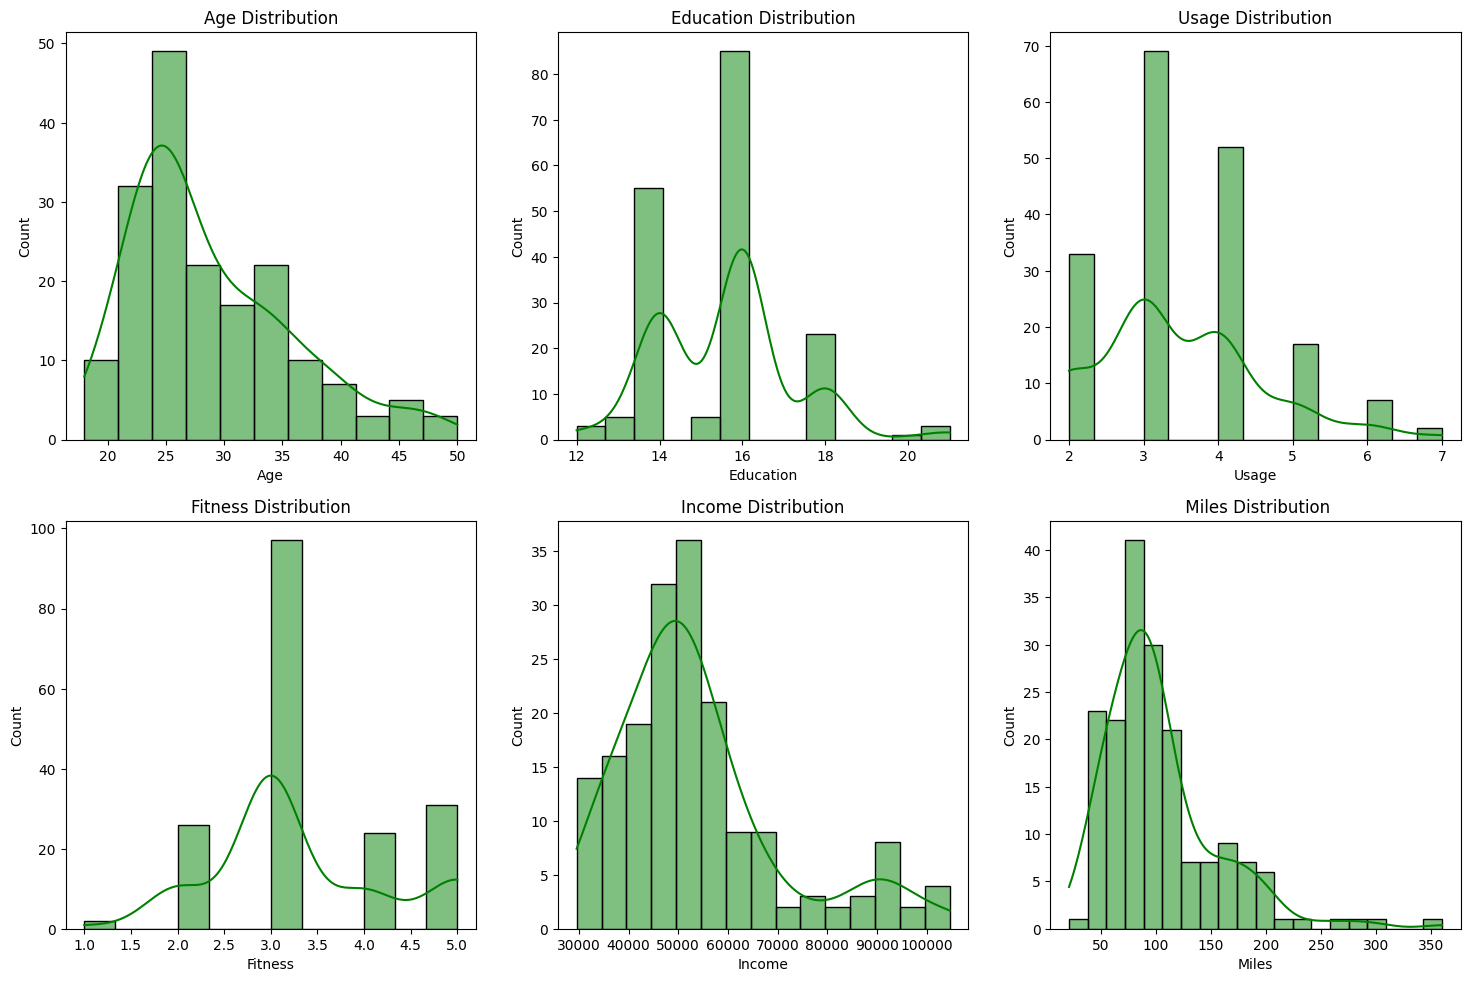

In [9]:
#histoplot and kde plot quantitative columns in the dataset
plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
sns.histplot(data = df ,  x="Age", kde= True ,color = "green")
plt.xlabel("Age")
plt.title("Age Distribution")

plt.subplot(3,3,2)
sns.histplot(data = df ,  x="Education", kde= True ,color = "green")
plt.xlabel("Education")
plt.title("Education Distribution")

plt.subplot(3,3,3)
sns.histplot(data = df ,  x="Usage", kde= True ,color = "green")
plt.xlabel("Usage")
plt.title("Usage Distribution")

plt.subplot(3,3,4)
sns.histplot(data = df ,  x="Fitness", kde= True ,color = "green")
plt.xlabel("Fitness")
plt.title("Fitness Distribution")

plt.subplot(3,3,5)
sns.histplot(data = df ,  x="Income", kde= True ,color = "green")
plt.xlabel("Income")
plt.title("Income Distribution")

plt.subplot(3,3,6)
sns.histplot(data = df ,  x="Miles", kde= True ,color = "green")
plt.xlabel("Miles")
plt.title(" Miles Distribution")
plt.show()


In [10]:
df["Age"].value_counts().head()

25    25
23    18
24    12
26    12
28     9
Name: Age, dtype: int64

**Outliers detection using BoxPlots**

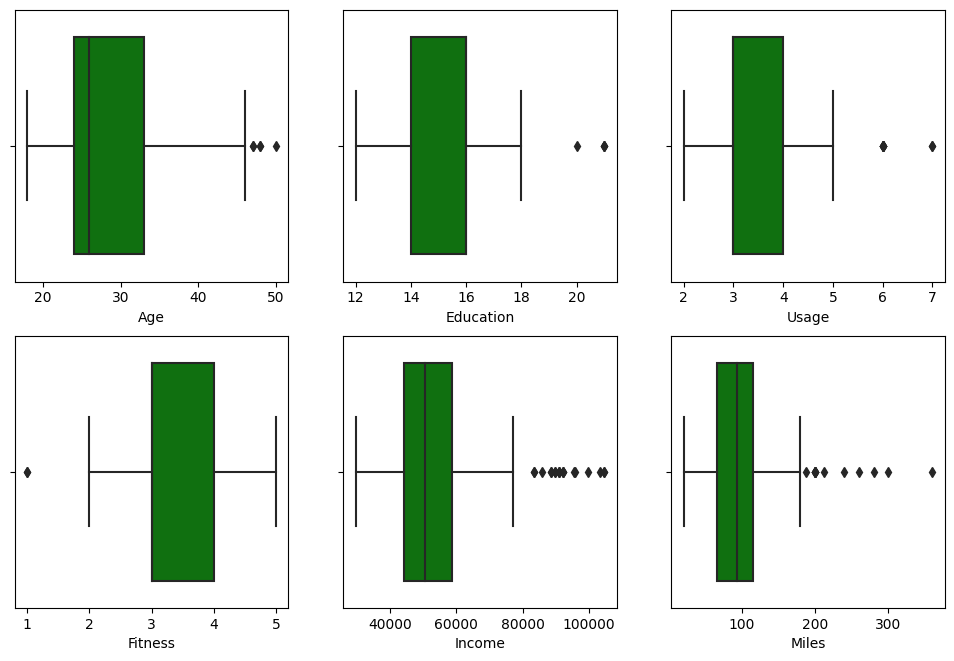

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.boxplot(data = df ,  x="Age", orient='h',color = "green")

plt.subplot(3,3,2)
sns.boxplot(data = df ,  x="Education", orient='h' ,color = "green")

plt.subplot(3,3,3)
sns.boxplot(data = df ,  x="Usage",orient='h' ,color = "green")

plt.subplot(3,3,4)
sns.boxplot(data = df ,  x="Fitness",orient='h' ,color = "green")

plt.subplot(3,3,5)
sns.boxplot(data = df ,  x="Income", orient='h' ,color = "green")

plt.subplot(3,3,6)
sns.boxplot(data = df ,  x="Miles", orient='h' ,color = "green")
plt.show()

From the above boxplot its very evident that :  Age, Education, Fitness hav very few outliers 

Income and Miles have more number of outliers

**Understanding the distribution of the data for the qualitative attributes**

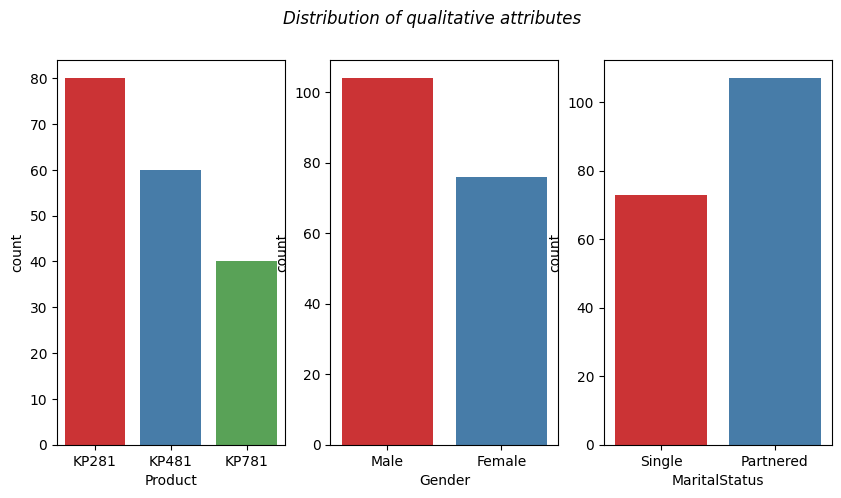

In [12]:
#count plot for categorical columns in the dataset
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(data = df ,  x="Product",palette='Set1')

plt.subplot(1,3,2)
sns.countplot(data = df ,  x="Gender",palette='Set1')

plt.subplot(1,3,3)
sns.countplot(data = df ,  x="MaritalStatus", palette='Set1')

plt.suptitle("Distribution of qualitative attributes",style = "italic")

plt.show()

In [13]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [14]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [15]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Most brought product is KP281

There are 104 males and 76 females in the dataset

There are 107 partnered and 73 single people in the dataset

In [16]:
#count of each column 
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt() 
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

44.44% of the customers have purchased KP2821 product.


33.33% of the customers have purchased KP481 product.


22.22% of the customers have purchased KP781 product.

57.78% of the customers are Male.

59.44% of the customers are Partnered.




# **Bivariate Analysis**

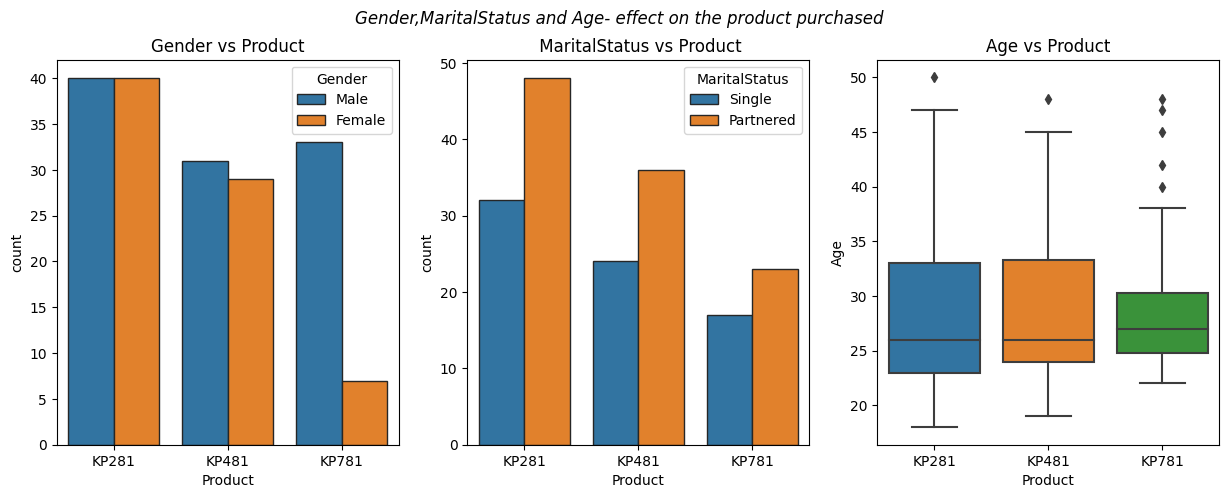

In [17]:
#Gender, MaritalStatus and Age have any effect on the product purchased
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(data = df ,  x="Product", hue= "Gender", edgecolor="0.15")
plt.title("Gender vs Product")

plt.subplot(1,3,2)
sns.countplot(data = df ,  x="Product", hue = "MaritalStatus",edgecolor="0.15" )
plt.title(" MaritalStatus vs Product")

plt.subplot(1,3,3)
sns.boxplot(data = df , x = "Product", y= "Age")
plt.title("Age vs Product")

plt.suptitle("Gender,MaritalStatus and Age- effect on the product purchased",style = "italic")

plt.show()


Equal number of males and females have purchased KP281 product as it the an entry-level treadmill.
Almost same for the product KP481

Most of the Male customers have purchased the KP781 product.

Customer who is partnered, is more likely to purchase the product.

 **Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)**

In [18]:
df2= pd.crosstab( index = df["Product"], 
            columns=df["Product"],
            margins=True)/ len(df)
df2

Product,KP281,KP481,KP781,All
Product,,,,
KP281,0.444444,0.000000,0.000000,0.444444
KP481,0.000000,0.333333,0.000000,0.333333
KP781,0.000000,0.000000,0.222222,0.222222
All,0.444444,0.333333,0.222222,1.000000


KP281 has 45% chances of being sold

KP481 has 33% chances of being sold 

KP781 has 22% chances of being sold 

# **Customer profiling**

## **Converting Income to catagorical via binning for better analysis**

In [19]:
# adding column Product prize in the dataframe
df1 = df
df1['Product_price'] = 1500

df1['Product_price']=np.where(df1['Product']=='KP481',1750,df1['Product_price'])

df1['Product_price']=np.where(df1['Product']=='KP781',2500,df1['Product_price'])
df1.sample(4)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
11,KP281,22,Female,14,Partnered,3,2,35247,66,1500
6,KP281,21,Female,14,Partnered,3,3,35247,75,1500
174,KP781,38,Male,18,Partnered,5,5,104581,150,2500


In [25]:

  df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
  df1


Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [21]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-21-ddad40656196>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
<ipython-input-21-ddad40656196>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
